Set 1: [Classifiers]
===
Task 1
---
Load cs-training.csv into a Pandas dataframe.

In [126]:
import pandas as pd
cs_training = pd.read_csv("D:/课程学习资料/研一M3/Machine Learning for Finance/Homeworks/Set 1/archive/cs-training.csv")
cs_training

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


Task 2
---
Fill-in the missing values (nan) with the column means. (Use pd.fillna() or See Ch 4 of PML)

In [127]:
# identifying missing values
cs_training.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [128]:
# fill-in the missing values using the column means
cs_training_new = cs_training.fillna(cs_training.mean())

In [129]:
# have a double check
cs_training_new.isnull().sum()
# It works!

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

Task 3
---
Select the 2 most important features using LogisticRegression with L1 penalty. (Adjust C until you see 2 features)

In [130]:
# firstly, let's standardize the training features!
from sklearn.preprocessing import StandardScaler
X_train = cs_training_new.iloc[:,list(range(2,12))]
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
Y_train = cs_training_new.iloc[:,1]

In [131]:
# next, let's train our model. so excited ：）
from sklearn.linear_model import LogisticRegression
# after trying a lot of values of C，I find that 0.0005 works well！
lr = LogisticRegression(penalty='l1',C=0.0005,solver='liblinear',multi_class='ovr')
lr.fit(X_train_std,Y_train)
lr.coef_
# so the two most important features are age and NumberOfTime30-59DaysPastDueNotWorse
# in fact, these two features make sense given that: 
# (1) older people have poor competence to make money (in a general case)
# (2) people who do not make the overdue more worse could be turst.

array([[ 0.        , -0.20223382,  0.09574063,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

Task 4
---
Using the 2 selected features, apply LR / SVM / decision tree. Try your own hyperparameters (C, gamma, tree depth, etc) to maximize the prediction accuracy. (Just try several values. You don't need to show your answer is the maximum.)

In [132]:
# data preparation
# (1)train data and standardization
X_train_task4 = cs_training_new.iloc[:,[3,4]]
sc.fit(X_train_task4)
X_train_task4_std = sc.transform(X_train_task4)
Y_train_task4 = cs_training_new.iloc[:,[1]]

# (2)test data
cs_test = pd.read_csv("D:/课程学习资料/研一M3/Machine Learning for Finance/Homeworks/Set 1/archive/cs-test.csv")
X_test_task4 = cs_test.iloc[:,[3,4]]
sc.fit(X_test_task4)
X_test_task4_std = sc.transform(X_test_task4)

Y_test_task4 = pd.read_csv("D:/课程学习资料/研一M3/Machine Learning for Finance/Homeworks/Set 1/archive/sampleEntry.csv")
# sampleEntry.csv provides the probability. to calculate the accuracy, I plan to transform the probability to the 0-1 binary value.
# my standard is as follows.
# if the probability is no less than 0.5, then I transform it to 1. If not, then I transform it to 0.
Y_test_task4.loc[Y_test_task4[Y_test_task4['Probability']>=0.5].index,'Probability']=1
Y_test_task4.loc[Y_test_task4[Y_test_task4['Probability']<0.5].index,'Probability']=0
Y_test_task4 = Y_test_task4['Probability']
Y_test_task4 = pd.DataFrame(Y_test_task4)

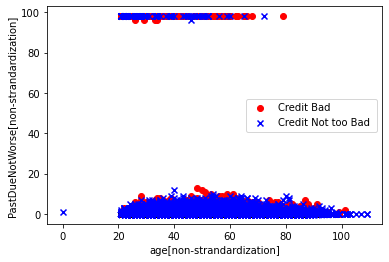

In [133]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(cs_training_new.query('SeriousDlqin2yrs==1').iloc[:,3],cs_training_new.query('SeriousDlqin2yrs==1').iloc[:,4],
           color='red', marker='o', label='Credit Bad')
plt.scatter(cs_training_new.query('SeriousDlqin2yrs==0').iloc[:,3],cs_training_new.query('SeriousDlqin2yrs==0').iloc[:,4],
           color='blue', marker='x', label='Credit Not too Bad ')
plt.xlabel('age[non-strandardization]')
plt.ylabel('PastDueNotWorse[non-strandardization]')
plt.legend(loc='center right')

Task 4.1 Apply LR
---

In [172]:
#apply LR and maximize the prediction accuracy
from sklearn.metrics import accuracy_score
accuracy, params = [], []
for c in range(-5, -1):
    lr = LogisticRegression(penalty='l1',C=10.**c,solver='liblinear',multi_class='ovr')
    lr.fit(X_train_task4_std, Y_train_task4.values.ravel())
    Y_prediction_task4 = lr.predict(X_test_task4_std)
    accuracy.append(accuracy_score(Y_test_task4,Y_prediction_task4))
    params.append(10.**c)
print(accuracy,params)
# According to the accuracy, the optimal value of C is 0.01

[0.98320246692216, 0.98320246692216, 0.9833896535077781, 0.9836359516467493] [1e-05, 0.0001, 0.001, 0.01]


Task 4.2 Apply SVM
---

In [177]:
#apply SVM and maximize the prediction accuracy
from sklearn.svm import SVC
accuracy, params = [], []
for a in range(-2,1):
    for b in range(-2,1):
        svm = SVC(kernel='poly', random_state=1, gamma=10.**a, C=10.**b,max_iter = 1000) # it takes a long time to converge.
        svm.fit(X_train_task4_std, Y_train_task4.values.ravel())
        Y_prediction_task4 = svm.predict(X_test_task4_std)
        accuracy.append(accuracy_score(Y_test_task4,Y_prediction_task4))
        params.append([10.**a,10.**b])
print(accuracy,params)
# According to the accuracy, the optimal values of gamma and C are 1 and 1

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or M

[0.016364048353250643, 0.016364048353250643, 0.016364048353250643, 0.016364048353250643, 0.016797533077840064, 0.9837640266790144, 0.01695516388678167, 0.9840989921480153, 0.9841778075524862] [[0.01, 0.01], [0.01, 0.1], [0.01, 1.0], [0.1, 0.01], [0.1, 0.1], [0.1, 1.0], [1.0, 0.01], [1.0, 0.1], [1.0, 1.0]]


Task 4.3 Apply decision tree
---

In [170]:
#apply decision tree and maximize the prediction accuracy
from sklearn.tree import DecisionTreeClassifier
accuracy, params = [], []
for d in range(1,10):
    tree_model = DecisionTreeClassifier(criterion='gini',max_depth=d,random_state=1)
    tree_model.fit(X_train_task4_std, Y_train_task4.values.ravel())
    Y_prediction_task4 = tree_model.predict(X_test_task4_std)
    accuracy.append(accuracy_score(Y_test_task4,Y_prediction_task4))
    params.append(d)
print(accuracy,params)
# According to the accuracy, the optimal value of max_depth is 6

[0.98320246692216, 0.98320246692216, 0.98320246692216, 0.98320246692216, 0.9822960897707457, 0.9839512132646325, 0.9833009861777484, 0.9832221707732777, 0.9830349841876594] [1, 2, 3, 4, 5, 6, 7, 8, 9]


Task 5
---
Visualize your classifiers using the plot_decision_regions function from PML Ch. 3

In [135]:
# define the plot_decision according to PML ch.3
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

Task 5.1 Visualize the classifiers using LR 
---

C:\Users\Eason Cheung\AppData\Local\Temp\ipykernel_33772\4038726159.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


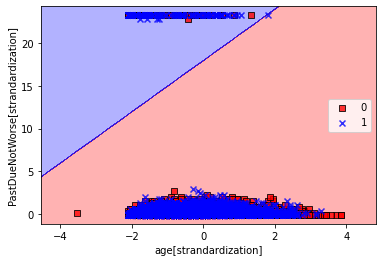

In [173]:
lr = LogisticRegression(penalty='l1',C=0.01,solver='liblinear',multi_class='ovr')
lr.fit(X_train_task4_std, Y_train_task4.values.ravel())
plot_decision_regions(X_train_task4_std, Y_train_task4.values.ravel(), lr)
plt.xlabel('age[strandardization]')
plt.ylabel('PastDueNotWorse[strandardization]')
plt.legend(loc='center right')

Task 5.2 Visualize the classifiers using SVM
---

C:\Users\Eason Cheung\AppData\Local\Temp\ipykernel_33772\4038726159.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


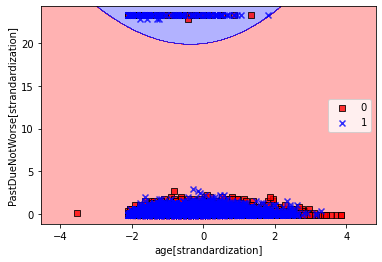

In [178]:
plot_decision_regions(X_train_task4_std, Y_train_task4.values.ravel(), svm)
plt.xlabel('age[strandardization]')
plt.ylabel('PastDueNotWorse[strandardization]')
plt.legend(loc='center right')

Task 5.3 Visualize the classifiers using decision tree
---

C:\Users\Eason Cheung\AppData\Local\Temp\ipykernel_33772\4038726159.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


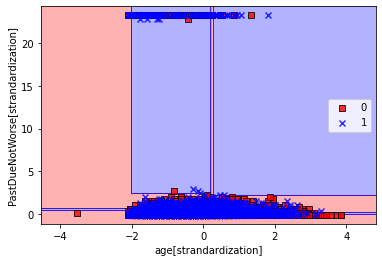

In [174]:
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=1)
tree_model.fit(X_train_task4_std, Y_train_task4.values.ravel())
plot_decision_regions(X_train_task4_std, Y_train_task4.values.ravel(), tree_model)
plt.xlabel('age[strandardization]')
plt.ylabel('PastDueNotWorse[strandardization]')
plt.legend(loc='center right')